In [51]:
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [52]:
df = pd.read_csv('housing.data.csv', delim_whitespace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


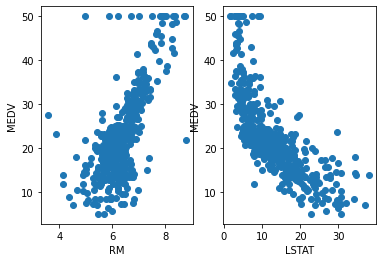

In [53]:
# From the previous exercice : 
# target = MEDV
# explanatory = RM, LSTAT
plt.subplot(1,2,1)
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.subplot(1,2,2)
plt.scatter(df['LSTAT'],df['MEDV'])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [54]:
X = df[['LSTAT','RM']] 
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=5)
lm = LinearRegression()
lm.fit(X_train, y_train)
# Predict on any(!!) input data
Xvals = np.array([20,6.2]).reshape(1,2) # need two columns
lm.predict(Xvals) # prediction in USD1000's

c:\users\hocin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.84585712])

In [55]:
y_train_predict = lm.predict(X_train)# evalution on train data
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


y_test_predict = lm.predict(X_test)# evaluate on test data
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)
print(rmse,r2)
print(rmse_test,r2_test)

5.6371293350711955 0.6300745149331701
5.137400784702912 0.6628996975186952


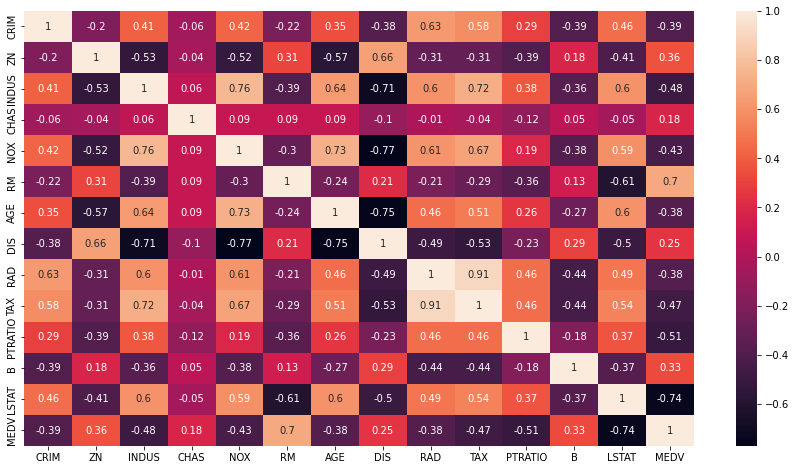

In [56]:
# Let's add an other explanatory variable
plt.figure(figsize = (15,8)) # set figure size for heatmap
sns.heatmap(data=df.corr().round(2), annot=True)
plt.show()

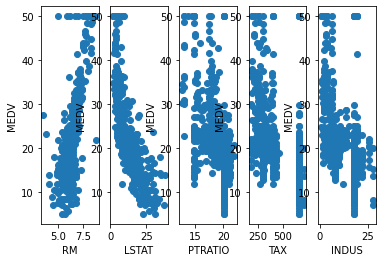

In [57]:
# From the Heatmap we can say that PTRATIO,INDUS and Tax have the highest correlation with MEDV (after LSTAT and RM)

# target = MEDV
# explanatory = RM, LSTAT, PTRATIO 
plt.subplot(1,5,1)
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel("RM")
plt.ylabel("MEDV")

plt.subplot(1,5,2)
plt.scatter(df['LSTAT'],df['MEDV'])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.subplot(1,5,3)
plt.scatter(df['PTRATIO'],df['MEDV'])
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")

plt.subplot(1,5,4)
plt.scatter(df['TAX'],df['MEDV'])
plt.xlabel("TAX")
plt.ylabel("MEDV")

plt.subplot(1,5,5)
plt.scatter(df['INDUS'],df['MEDV'])
plt.xlabel("INDUS")
plt.ylabel("MEDV")


plt.show()

In [58]:
X = df[['LSTAT','RM','PTRATIO','TAX','INDUS']] 
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=5)
lm = LinearRegression()
lm.fit(X_train, y_train)
# Predict on any(!!) input data
Xvals = np.array([20,6.2,15,250,20]).reshape(1,5) # need four columns
lm.predict(Xvals) # prediction in USD1000's

c:\users\hocin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.40461111])

In [59]:
y_train_predict = lm.predict(X_train)# evalution on train data
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


y_test_predict = lm.predict(X_test)# evaluate on test data
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)
print(rmse,r2)
print(rmse_test,r2_test)

5.29830406899895 0.6732075523202916
4.883605981271865 0.695383460097292


## After adding multiple explanatory variables, Rmse decreased and r2 increased which means adding the other variables has improved a better accuarcy of the model. 